### About this Dataset

**Context:** This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.



In [97]:
# Import pandas library
import pandas as pd

In [98]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
df = pd.read_csv(path)

In [99]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
# to view dimensions
df.shape

(768, 9)

In [101]:
# Statistical overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
# Missing Values
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [104]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64

Glucose
Glucose
False    768
Name: count, dtype: int64

BloodPressure
BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
SkinThickness
False    768
Name: count, dtype: int64

Insulin
Insulin
False    768
Name: count, dtype: int64

BMI
BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
Age
False    768
Name: count, dtype: int64

Outcome
Outcome
False    768
Name: count, dtype: int64



In [105]:
# no missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [106]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [107]:
# Outlier Detection
# # IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [108]:
# Visualization
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

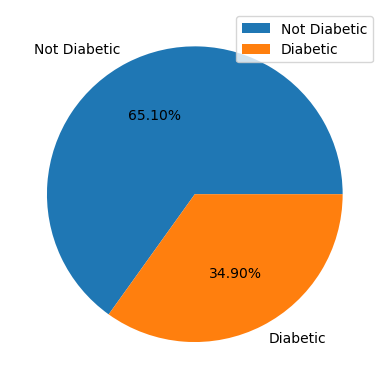

In [109]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()
# The pie chart shows that 65.1% of the patients are not diabetic and 34.9% are diabetic.

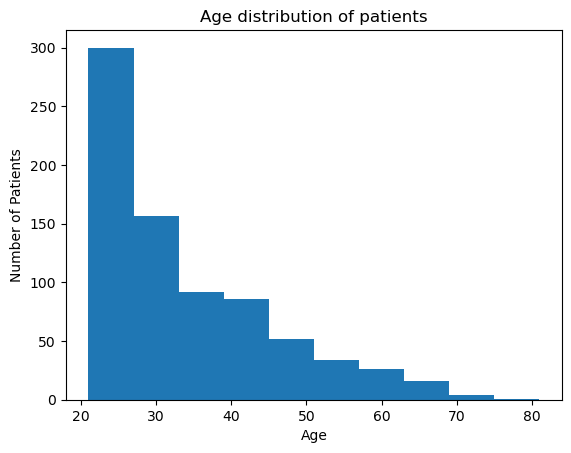

In [110]:
# Let's see the distribution of the age of the patients
plt.hist(df['Age'],bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age distribution of patients')
plt.show()
# Maximum number of patients are in the age group of 20-30
# Minimum number of patients are in the age group of 60-80

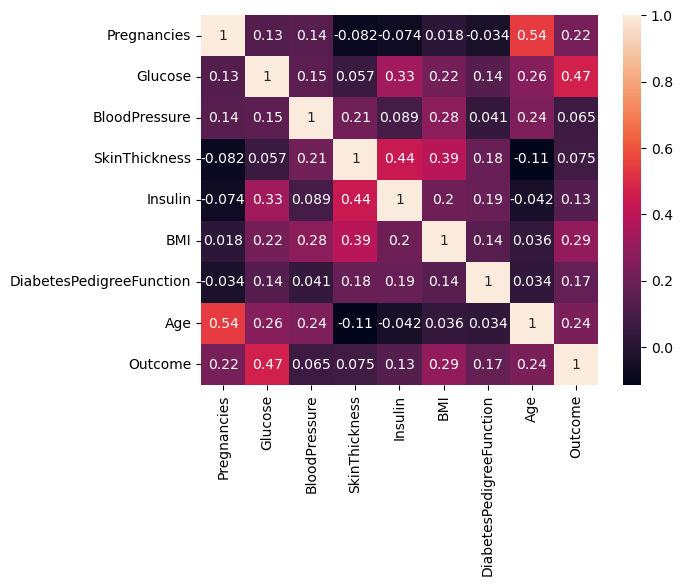

In [111]:
# Multivariate Analysis
# Correlation
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.show()
# Glucose and Outcome: 0.47 (Moderate Correlation)
# BMI and SkinThickness: 0.39 (Moderate Correlation)
# Age and Pregnancies: 0.54 (Moderate Correlation)
# SkinThickness and Insulin: 0.44 (Moderate Correlation)
# Insulin and Glucose: 0.33 (Low Correlation)
# Note: Correlation does not imply causation
# no strong correlation between the variables


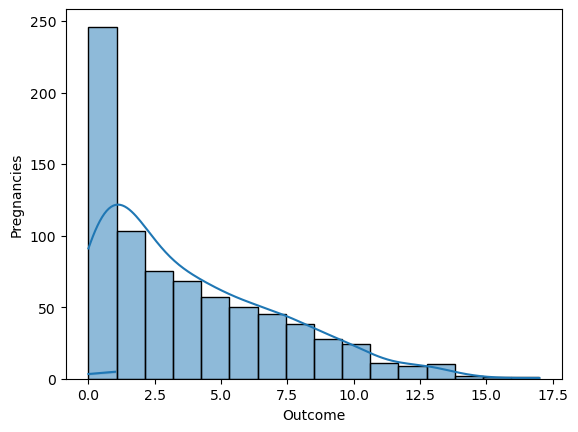

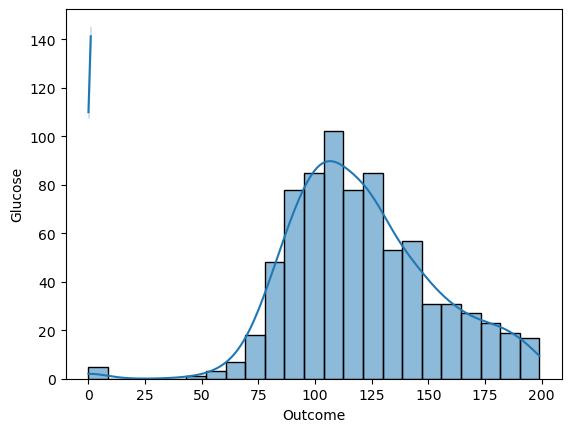

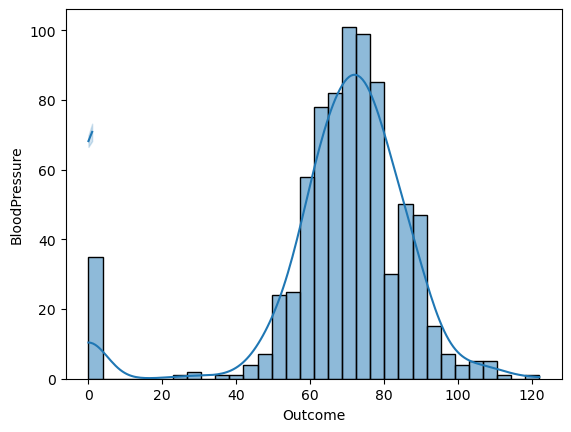

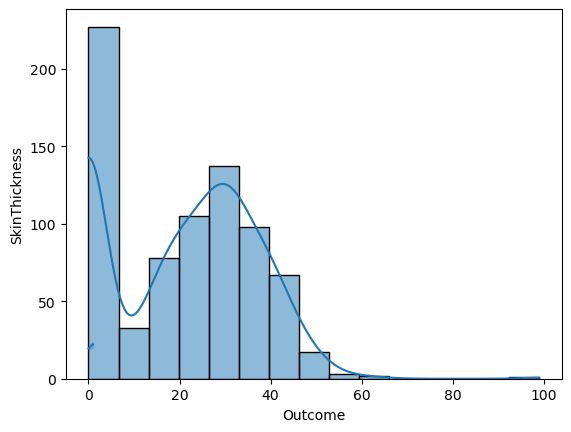

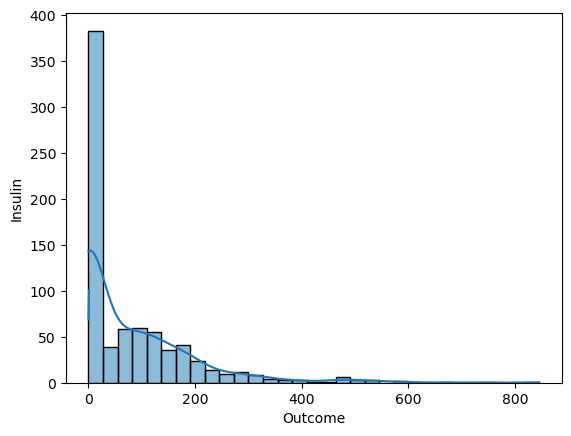

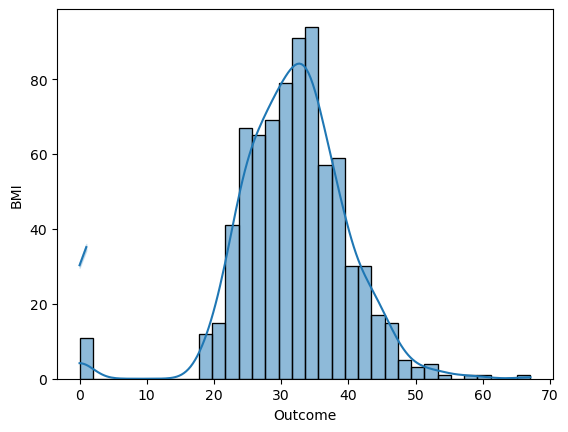

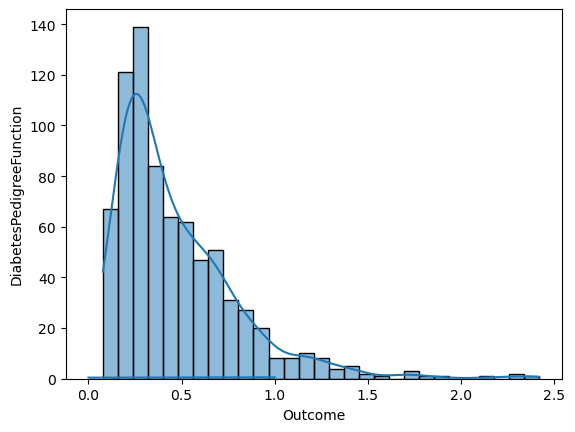

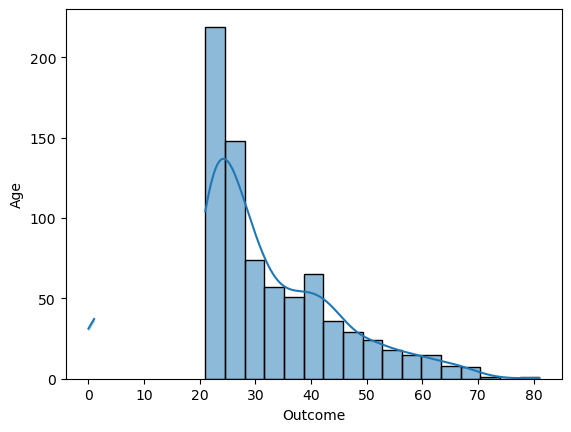

In [114]:
# Line Plot + Histogram
for column in df.columns:
    if column != 'Outcome':
        sns.lineplot(x='Outcome',y=column,data=df)
        sns.histplot(df[column],kde=True)
        plt.show()

In [ ]:
# The line plot and histogram can be used to compare the distribution of the variables for diabetic and non-diabetic patients.